## Desafio parte 1

### Descrição:

    - Análise exploratória para entendimento das principais características dos dados.

### Perguntas:
    
    - Quais são os estabelecimentos com maior número de reviews?
    - Quais são as categorias de estabelecimento?

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
df = pd.read_csv('data/X_testToronto.csv')
df_reviews = pd.read_csv('data/reviewsTrainToronto.csv')

In [19]:
df.head()

,business_id,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ..."
1,h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,NaN,"Diagnostic Imaging, Diagnostic Services, Docto...",NaN,"{'type': 'Point', 'coordinates': [-79.3768696,..."
2,AycqWXrDVlbRfJE-kA5MMw,Savour Toronto,NaN,NaN,43.653226,-79.383184,8,1,{'RestaurantsPriceRange2': '3'},"Party & Event Planning, Hotels & Travel, Local...",NaN,"{'type': 'Point', 'coordinates': [-79.3831843,..."
3,EVC1vn1KQ2uETnTbDWXc5w,Cadillac Jenkins,930 Queen Street W,M6J 1G6,43.645042,-79.416121,13,0,"{'RestaurantsReservations': 'False', 'GoodForK...","Caribbean, Tapas/Small Plates, Restaurants","{'Tuesday': '17:0-2:0', 'Wednesday': '17:0-2:0...","{'type': 'Point', 'coordinates': [-79.4161208,..."
4,fdTDe7XIXfhftmgNfR_-3g,Laura Secord,"Toronto Eaton Centre, 220 Yonge Street",M5B 2H1,43.654067,-79.380082,3,0,"{'BusinessParking': ""{'garage': False, 'street...","Specialty Food, Chocolatiers & Shops, Food",NaN,"{'type': 'Point', 'coordinates': [-79.3800815,..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   1324 non-null   object 
 1   name          1324 non-null   object 
 2   address       1309 non-null   object 
 3   postal_code   1317 non-null   object 
 4   latitude      1324 non-null   float64
 5   longitude     1324 non-null   float64
 6   review_count  1324 non-null   int64  
 7   is_open       1324 non-null   int64  
 8   attributes    1126 non-null   object 
 9   categories    1321 non-null   object 
 10  hours         978 non-null    object 
 11  loc           1324 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 124.2+ KB


<Axes: xlabel='review_count', ylabel='name'>

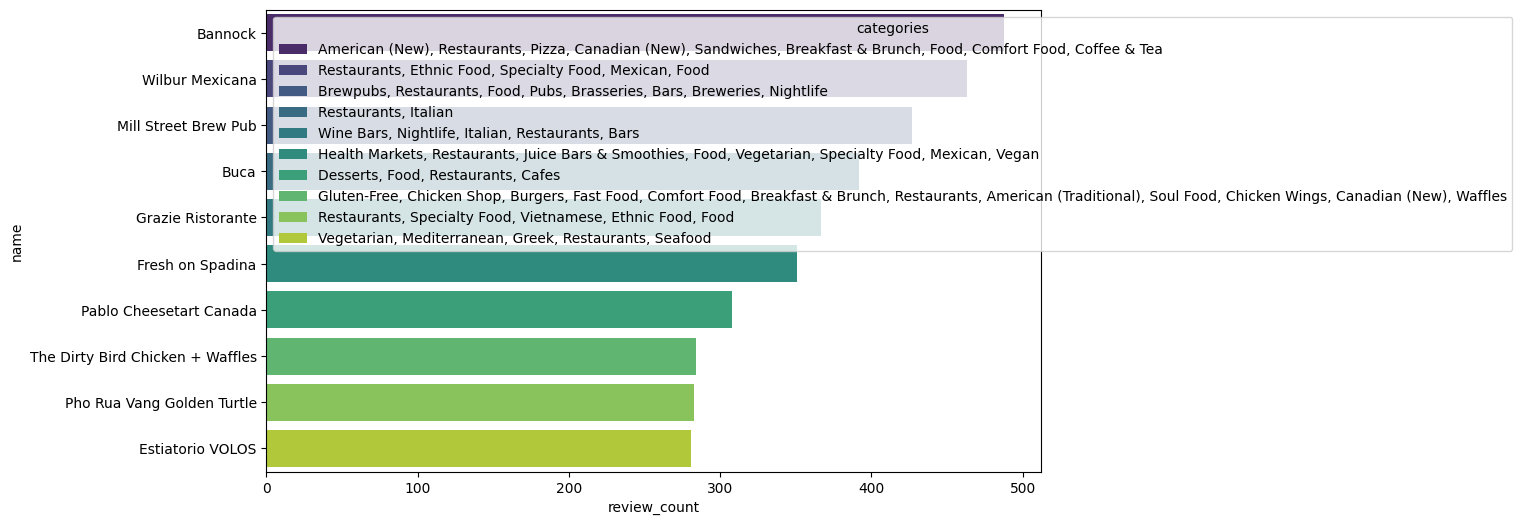

In [32]:
## Quais são os estabelecimentos com maior número de reviews?
df_max_reviews = df[['name','categories','review_count']].sort_values(by='review_count',ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='review_count', y='name', hue='categories', data=df_max_reviews,palette='viridis')

/tmp/ipykernel_14273/3185968143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')


<Axes: xlabel='count', ylabel='categories'>

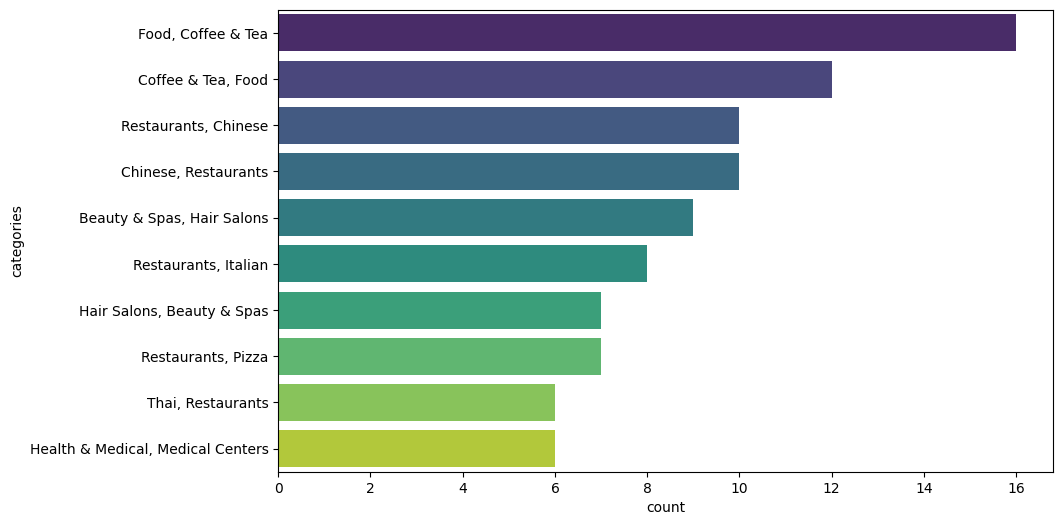

In [31]:
## Quais são as categorias de estabelecimento?
# Algumas categorias estão 
df_categorias = df.groupby('categories').size().sort_values(ascending=False).head(10).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')